In [1]:
# !pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from category_encoders import MEstimateEncoder

### Data Reading and Understanding 

In [3]:
data = pd.read_csv('data.csv')
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.shape

(4600, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
data.city.value_counts().head()

city
Seattle     1573
Renton       293
Bellevue     286
Redmond      235
Issaquah     187
Name: count, dtype: int64

In [7]:
data.street.value_counts()

street
2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: count, Length: 4525, dtype: int64

In [8]:
data.waterfront.value_counts()

waterfront
0    4567
1      33
Name: count, dtype: int64

In [9]:
data.statezip.value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [10]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [11]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Data Visualization

<Axes: xlabel='city'>

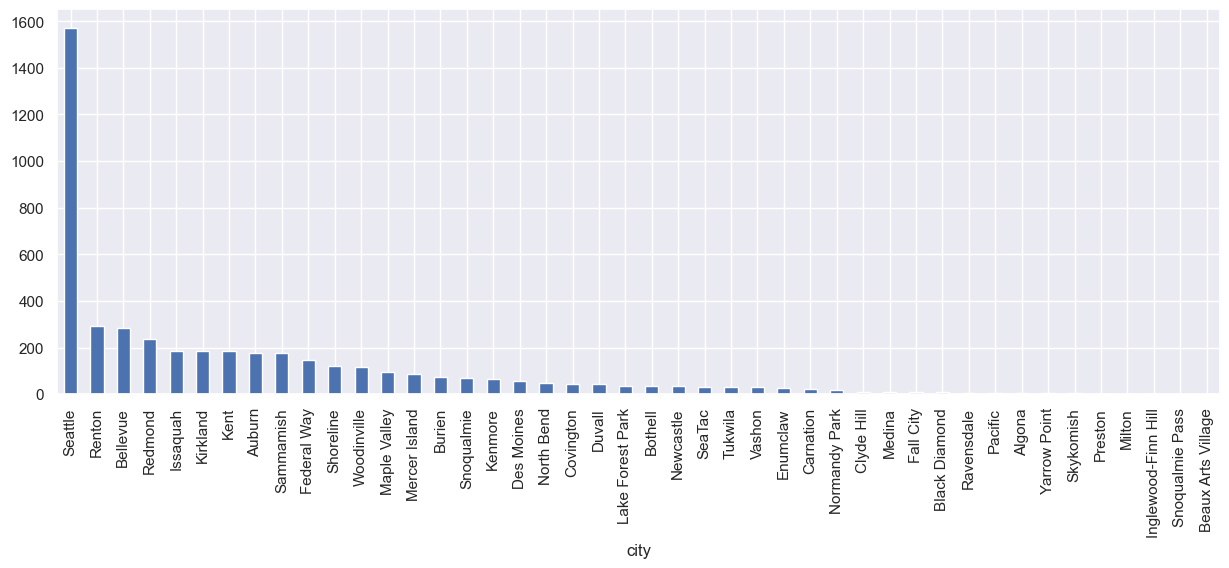

In [12]:
data.city.value_counts().plot(kind='bar',figsize=(15,5))

In [13]:
data[data['city']=='Seattle']['price'].max() - data[data['city']=='Renton']['price'].max()

11763750.0

<Axes: xlabel='city'>

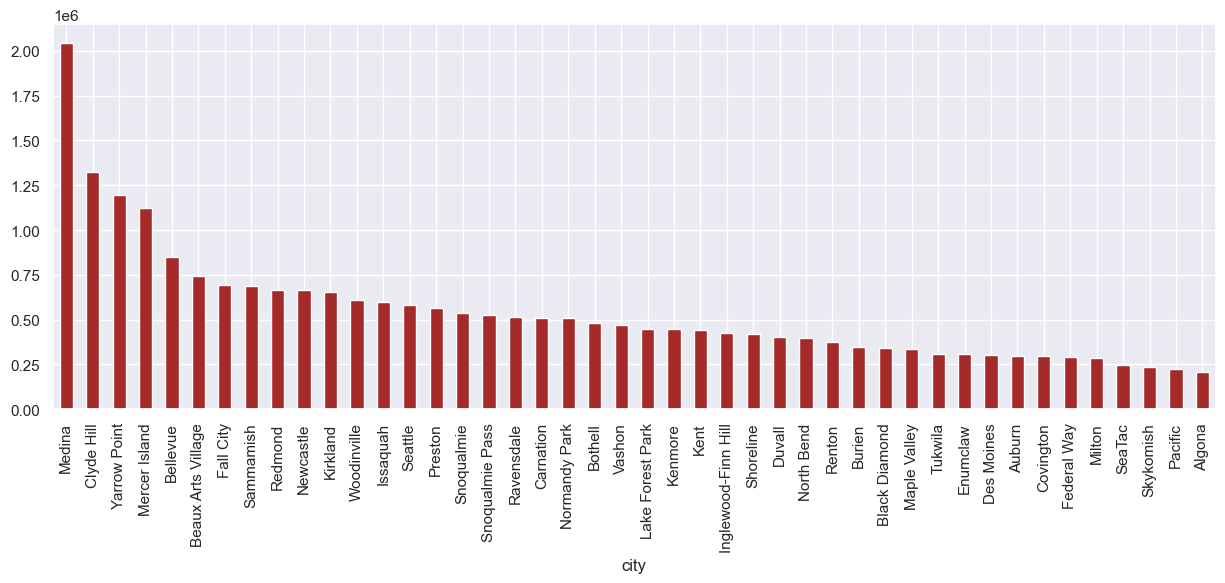

In [14]:
# plt.figure(figsize=(15,5))
# data[data['city']=='Seattle']['price'].mean()
# data[data['city']]['price'].mean().plot(kind='bar',ascending=False)
data.groupby('city')['price'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(15,5),color='brown')

Text(0.5, 1.0, 'Ratings/Condition')

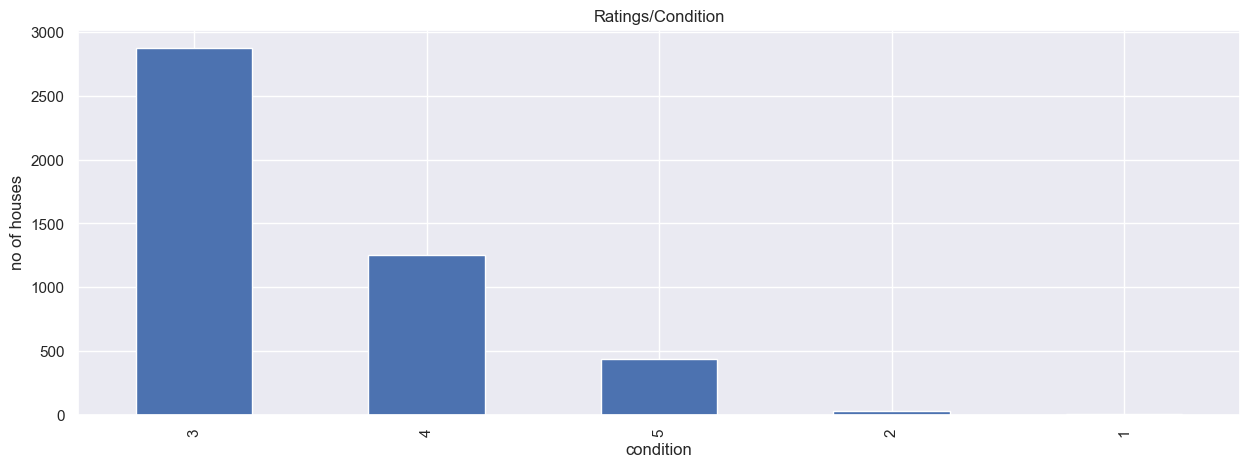

In [15]:
data.condition.value_counts().plot(kind='bar',figsize=(15,5))
plt.xlabel('condition')
plt.ylabel('no of houses')
plt.title('Ratings/Condition')

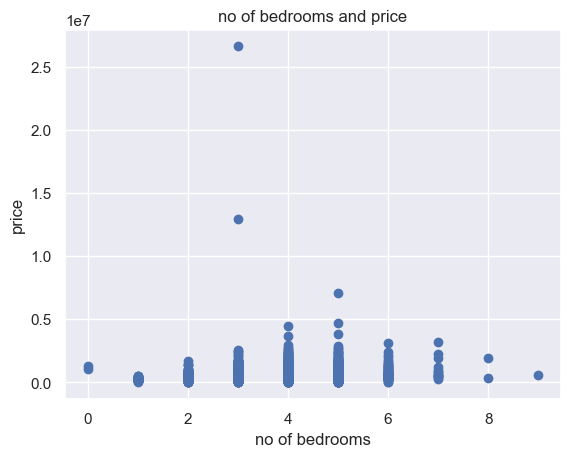

In [16]:
plt.scatter(data['bedrooms'],data['price'])
plt.xlabel('no of bedrooms')
plt.ylabel('price')
plt.title('no of bedrooms and price')
plt.show()

In [17]:
data.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA


In [18]:
data[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


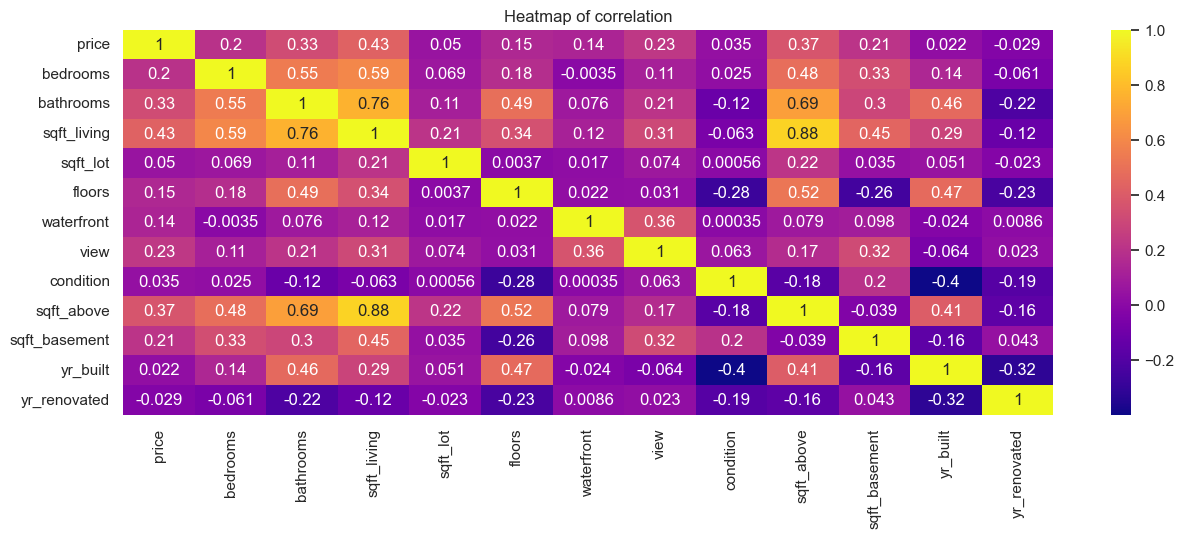

In [19]:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
corrmatrix = numeric_columns.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corrmatrix,annot=True,cmap='plasma')
plt.title('Heatmap of correlation')
plt.show()

In [20]:
data['date'] = pd.to_datetime(data['date'])

data['age'] = data['date'].dt.year - data['yr_built']
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age
0,2014-05-02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,59
1,2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,93
2,2014-05-02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,48
3,2014-05-02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,51
4,2014-05-02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,60
4596,2014-07-09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,31
4597,2014-07-09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,5
4598,2014-07-10,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,40


In [21]:
data = data.drop(['date','yr_built','country'],axis=1)
data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,street,city,statezip,age
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,2005,18810 Densmore Ave N,Shoreline,WA 98133,59
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,0,709 W Blaine St,Seattle,WA 98119,93


In [22]:
x=data.drop('price',axis=1)
y=data['price']

In [23]:
data = data[['street', 'statezip', 'city', 'sqft_living', 'sqft_above', 'bathrooms', 'sqft_lot']]
data

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,7912
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,9050
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,11947
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,8030
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,10500
...,...,...,...,...,...,...,...
4595,501 N 143rd St,WA 98133,Seattle,1510,1510,1.75,6360
4596,14855 SE 10th Pl,WA 98007,Bellevue,1460,1460,2.50,7573
4597,759 Ilwaco Pl NE,WA 98059,Renton,3010,3010,2.50,7014
4598,5148 S Creston St,WA 98178,Seattle,2090,1070,2.00,6630


In [24]:
data = data.join(y)

In [25]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,7912
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,9050
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,11947
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,8030
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,10500
...,...,...,...,...,...,...,...
4595,501 N 143rd St,WA 98133,Seattle,1510,1510,1.75,6360
4596,14855 SE 10th Pl,WA 98007,Bellevue,1460,1460,2.50,7573
4597,759 Ilwaco Pl NE,WA 98059,Renton,3010,3010,2.50,7014
4598,5148 S Creston St,WA 98178,Seattle,2090,1070,2.00,6630


In [26]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

### Encoding the Data into numerical Data

In [61]:
encodeddata = MEstimateEncoder(['street','statezip','city'],m=0.5)
X=encodeddata.fit_transform(x,y)

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot
0,3.926543e+05,375382.589956,420925.038640,1340,1340,1.50,7912
1,1.773321e+06,910780.097527,579828.609806,3650,3370,2.50,9050
2,4.119877e+05,321396.799516,439795.599753,1930,1930,2.00,11947
3,4.639877e+05,602458.148401,846665.448904,2000,1000,2.25,8030
4,5.506543e+05,637239.879032,667403.915787,1940,1140,2.50,10500
...,...,...,...,...,...,...,...
4595,3.894321e+05,375382.589956,579828.609806,1510,1510,1.75,6360
4596,5.402099e+05,638000.375382,846665.448904,1460,1460,2.50,7573
4597,4.619238e+05,499702.282870,377338.959552,3010,3010,2.50,7014
4598,3.195877e+05,266822.058806,579828.609806,2090,1070,2.00,6630


In [28]:
X

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot
0,3.926543e+05,375382.589956,420925.038640,1340,1340,1.50,7912
1,1.773321e+06,910780.097527,579828.609806,3650,3370,2.50,9050
2,4.119877e+05,321396.799516,439795.599753,1930,1930,2.00,11947
3,4.639877e+05,602458.148401,846665.448904,2000,1000,2.25,8030
4,5.506543e+05,637239.879032,667403.915787,1940,1140,2.50,10500
...,...,...,...,...,...,...,...
4595,3.894321e+05,375382.589956,579828.609806,1510,1510,1.75,6360
4596,5.402099e+05,638000.375382,846665.448904,1460,1460,2.50,7573
4597,4.619238e+05,499702.282870,377338.959552,3010,3010,2.50,7014
4598,3.195877e+05,266822.058806,579828.609806,2090,1070,2.00,6630


### Splitting the data into training and testing data

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
lr = LinearRegression()
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

### Training the data

In [31]:
lr.fit(xtrain,ytrain)

LinearRegression()

### Testing with Linear Regression

In [32]:
predictions = lr.predict(xtest)

In [33]:
predictions

array([5.38644136e+05, 6.77157111e+03, 1.69663421e+06, 3.66851416e+05,
       2.73850071e+05, 6.28296453e+05, 4.55928944e+05, 3.04907924e+05,
       4.21003883e+05, 8.03174582e+05, 4.23058706e+05, 4.94114185e+05,
       5.99965245e+05, 3.08930912e+05, 2.11753383e+05, 9.14681723e+05,
       6.75567103e+05, 6.26281727e+05, 1.67841270e+06, 8.89340896e+05,
       1.68357744e+06, 6.15875472e+05, 6.15416195e+05, 5.88936659e+05,
       2.97695414e+05, 8.58788716e+04, 7.48645782e+05, 9.55554858e+05,
       4.13785358e+05, 7.73769818e+05, 3.17825867e+06, 2.50483294e+05,
       1.41618226e+06, 3.16139295e+05, 2.49474785e+05, 3.27493704e+05,
       4.65804222e+05, 5.46929681e+05, 2.15097591e+05, 6.53116997e+05,
       3.05734632e+05, 4.33790748e+05, 3.35544754e+05, 6.10958347e+05,
       2.43770225e+05, 3.63221721e+05, 2.62201992e+05, 6.13796063e+05,
       1.24832798e+06, 8.26043349e+05, 5.08564654e+05, 4.38071974e+05,
       5.30498317e+05, 5.52161245e+05, 1.73255854e+05, 6.09305860e+05,
      

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cvs=cross_val_score(lr,xtrain,ytrain,cv=10,n_jobs=-1)
print('Accuracy: {:.2f} %'.format(cvs.mean() * 100))

Accuracy: 98.33 %


In [36]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

In [37]:
lr.score(xtrain,ytrain)

0.9822947640725993

In [38]:
lr.score(xtest,ytest)

0.9992344735114413

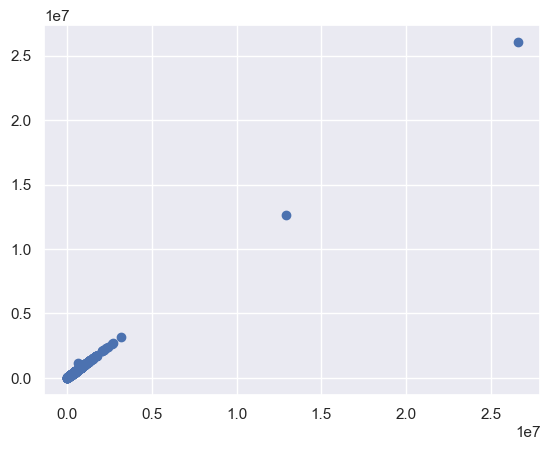

In [39]:
plt.scatter(ytest,predictions)

In [40]:
actual_predictions = pd.DataFrame(columns=['Actual','Predicted','Error'])
actual_predictions['Actual'] = ytest
actual_predictions['Predicted']=predictions 
actual_predictions['Error']=actual_predictions['Actual']-actual_predictions['Predicted']
actual_predictions

,Actual,Predicted,Error
3683,544000.0,5.386441e+05,5355.863532
4411,0.0,6.771571e+03,-6771.571115
2584,1712500.0,1.696634e+06,15865.787610
69,365000.0,3.668514e+05,-1851.416429
1844,275000.0,2.738501e+05,1149.928759
...,...,...,...
1612,750000.0,7.452253e+05,4774.711826
1068,230000.0,2.351500e+05,-5150.042197
4350,26590000.0,2.607384e+07,516156.271363
3027,687000.0,6.879621e+05,-962.140716


### Testing with Random Forest Regressor 

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf = RandomForestRegressor()

In [43]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [44]:
predictions = rf.predict(xtest)

In [45]:
actual_predictions = pd.DataFrame(columns=['Actual','Predicted','Error'])
actual_predictions['Actual'] = ytest
actual_predictions['Predicted']=predictions 
actual_predictions['Error']=actual_predictions['Actual']-actual_predictions['Predicted']
actual_predictions

,Actual,Predicted,Error
3683,544000.0,5.436990e+05,3.010000e+02
4411,0.0,0.000000e+00,0.000000e+00
2584,1712500.0,1.705400e+06,7.100010e+03
69,365000.0,3.649999e+05,1.000000e-01
1844,275000.0,2.761795e+05,-1.179500e+03
...,...,...,...
1612,750000.0,7.500100e+05,-1.000000e+01
1068,230000.0,2.299784e+05,2.155556e+01
4350,26590000.0,3.769430e+06,2.282057e+07
3027,687000.0,6.871418e+05,-1.418000e+02


In [46]:
cvs=cross_val_score(rf,xtrain,ytrain,cv=10,n_jobs=-1)
print('Accuracy: {:.2f} %'.format(cvs.mean() * 100))

Accuracy: 96.19 %


### Testing with Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dt = DecisionTreeRegressor()

In [49]:
dt.fit(xtrain,ytrain)
predictions = dt.predict(xtest)
predictions

array([ 544000.      ,       0.      , 1700000.      ,  365000.      ,
        295000.      ,  625000.      ,  453000.      ,  300000.      ,
        417838.      ,  850000.      ,  349000.      ,  500000.      ,
        589900.      ,  305000.      ,  210000.      ,  915000.      ,
        675000.      ,  630000.      , 1688000.      ,  883000.      ,
       1695000.      ,  612500.      ,  615000.      ,  590000.      ,
        302000.      ,   90000.      ,  745000.      ,  950000.      ,
        415000.      ,  775000.      , 3000000.      ,  253000.      ,
       1410000.      ,  314000.      ,  251750.      ,  325000.      ,
        455000.      ,  540000.      ,  215000.      ,  652500.      ,
        306000.      ,  435000.      ,  335000.      ,  610000.      ,
        245000.      ,  365000.      ,  260000.      ,  615000.      ,
       1250000.      ,  835000.      ,  489990.      ,  442900.      ,
        530000.      ,  550000.      ,  170000.      ,  615000.      ,
      

In [50]:
cvs=cross_val_score(dt,xtrain,ytrain,cv=10,n_jobs=-1)
print('Accuracy: {:.2f} %'.format(cvs.mean() * 100))

Accuracy: 92.50 %


In [51]:
actual_predictions = pd.DataFrame(columns=['Actual','Predicted','Error'])
actual_predictions['Actual'] = ytest
actual_predictions['Predicted']=predictions 
actual_predictions['Error']=actual_predictions['Actual']-actual_predictions['Predicted']
actual_predictions

,Actual,Predicted,Error
3683,544000.0,544000.0,0.0
4411,0.0,0.0,0.0
2584,1712500.0,1700000.0,12500.0
69,365000.0,365000.0,0.0
1844,275000.0,295000.0,-20000.0
...,...,...,...
1612,750000.0,750000.0,0.0
1068,230000.0,230000.0,0.0
4350,26590000.0,7062500.0,19527500.0
3027,687000.0,687500.0,-500.0


### Testing with Gradient Boost Regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
gb=GradientBoostingRegressor(random_state=42)

In [54]:
gb.fit(xtrain,ytrain)

GradientBoostingRegressor(random_state=42)

In [55]:
predictions=gb.predict(xtest)

In [56]:
predictions

array([5.44262220e+05, 2.52260071e+03, 1.69112275e+06, 3.69387887e+05,
       2.73183696e+05, 6.25126814e+05, 4.54844287e+05, 3.01221679e+05,
       4.21625973e+05, 8.10588008e+05, 4.07987567e+05, 5.01196661e+05,
       5.85596815e+05, 3.09073290e+05, 2.06198382e+05, 9.21816059e+05,
       6.79994267e+05, 6.25119157e+05, 1.65862845e+06, 8.69060541e+05,
       1.69072525e+06, 6.09013027e+05, 6.08098429e+05, 5.84970504e+05,
       3.05855669e+05, 9.27871748e+04, 7.42390031e+05, 9.51734517e+05,
       4.19094239e+05, 7.71784667e+05, 3.13900782e+06, 2.54882266e+05,
       1.40671824e+06, 3.13383022e+05, 2.48116062e+05, 3.31735709e+05,
       4.54970256e+05, 5.49257369e+05, 2.20020045e+05, 6.53230351e+05,
       3.09300606e+05, 4.38121329e+05, 3.30912996e+05, 6.08566951e+05,
       2.46411512e+05, 3.69217988e+05, 2.55050982e+05, 6.09568898e+05,
       1.24266712e+06, 8.32708637e+05, 4.96517781e+05, 4.49026420e+05,
       5.28652232e+05, 5.49201339e+05, 1.77956538e+05, 6.08839725e+05,
      

In [57]:
actual_predictions = pd.DataFrame(columns=['Actual','Predicted','Error'])
actual_predictions['Actual'] = ytest
actual_predictions['Predicted']=predictions 
actual_predictions['Error']=actual_predictions['Actual']-actual_predictions['Predicted']
actual_predictions

,Actual,Predicted,Error
3683,544000.0,5.442622e+05,-2.622201e+02
4411,0.0,2.522601e+03,-2.522601e+03
2584,1712500.0,1.691123e+06,2.137725e+04
69,365000.0,3.693879e+05,-4.387887e+03
1844,275000.0,2.731837e+05,1.816304e+03
...,...,...,...
1612,750000.0,7.514135e+05,-1.413484e+03
1068,230000.0,2.372627e+05,-7.262735e+03
4350,26590000.0,2.938983e+06,2.365102e+07
3027,687000.0,6.831178e+05,3.882229e+03


In [58]:
cvs=cross_val_score(dt,xtrain,ytrain,cv=10,n_jobs=-1)
print('Accuracy: {:.2f} %'.format(cvs.mean() * 100))

Accuracy: 90.26 %
